In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Used for hyper parameter tuning

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [5]:

#data loading

data = pd.read_csv("data.csv")

print(data.head())

#N - nitrogen
#p - Phosphorus
#k - Potassium


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
#EDA

<AxesSubplot:xlabel='N', ylabel='label'>

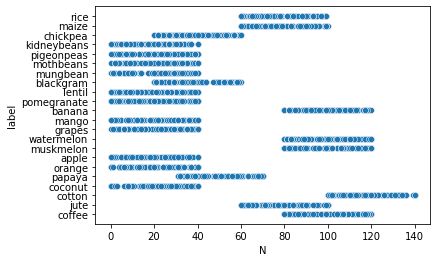

In [8]:
sns.scatterplot(data=data, x="N", y="label")

<AxesSubplot:xlabel='P', ylabel='label'>

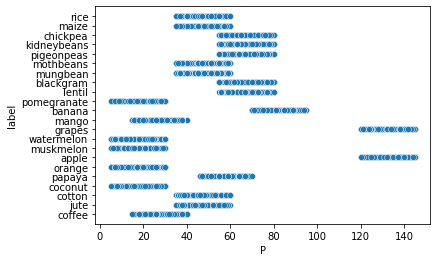

In [9]:
sns.scatterplot(data=data, x="P", y="label")

<AxesSubplot:xlabel='K', ylabel='label'>

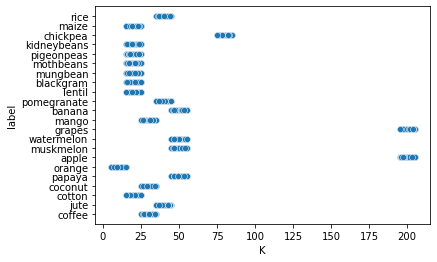

In [10]:
sns.scatterplot(data=data, x="K", y="label")

<AxesSubplot:xlabel='rainfall', ylabel='label'>

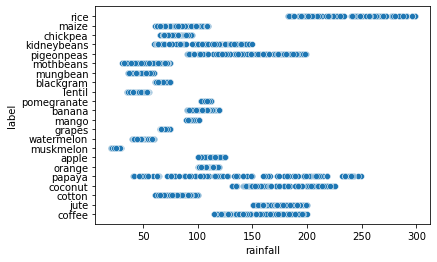

In [11]:
sns.scatterplot(data=data, x="rainfall", y="label")

<AxesSubplot:xlabel='temperature', ylabel='label'>

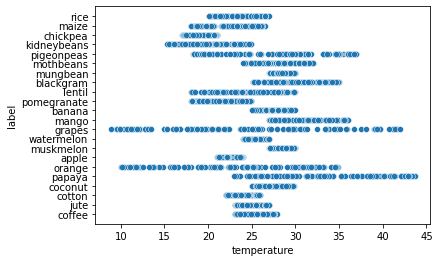

In [12]:

sns.scatterplot(data=data, x="temperature", y="label")


<AxesSubplot:>

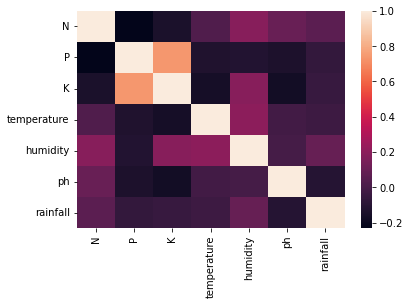

In [13]:
sns.heatmap(data.corr())

In [14]:
#No features are droping 
# spliting x_train and y_train

x = data.iloc[:, :7].values
y = data.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [15]:
model = LogisticRegression()

In [16]:
#Hyper parameter tuning

In [17]:

solvers = ['newton-cg','liblinear']
penalty = ['l2']
c_values = [100, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

ypred = grid_result.predict(x_test) #predict on test sample
evaluation = grid_result.score(x_test, y_test)
print("Accuracy is",evaluation)

Accuracy is 0.9840909090909091


In [18]:
#prediction
N=90
P =40 
K  =40        
temperature=20  
humidity =80    
ph=7
rainfall=200

prediction = grid_result.predict((np.array([[N,P,K,temperature,humidity,ph,rainfall]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction[0])

The Suggested Crop for Given Climatic Condition is : rice


In [19]:
#prediction
N=107
P =34 
K  =32        
temperature=26.774637  
humidity =66.413269    
ph=6.780064
rainfall=177.774507

prediction = grid_result.predict((np.array([[N,P,K,temperature,humidity,ph,rainfall]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction[0])

The Suggested Crop for Given Climatic Condition is : coffee


In [20]:
pickle.dump(grid_result, open("model.pkl","wb"))